# Session 2 - Multi-Armed Bandits - Assignment

In this assignment you will apply different multi-armed bandit algorithms in order to discover the bandit with highest reward.
We'll start with deterministic bandits, meaning that the bandit rewards are not subject to any underlying stochastic process.
Next we'll focuss on stochastic bandits where the reward of a bandit is the result of a stochastic process and therefore making the discovery of the best bandit much harder. 
Finally we will applay the MAB strategies to solve practical real-life problems.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Deterministic bandits
Assume you have to play 5 bandits with fixed rewards. These rewards are hidden and unknown when you start playing. 
You can play the bandits 100 times. Find out how you can maximize your total reward over these 100 trials.

Use the BanditEnv_1 environment for this experiment.

In [2]:
##### Deterministic Bandit Environment

class BanditEnv_1:
    def __init__(self):
        self.rewards = [-10,6,8,0,-2]
        
    def reset(self):
        self.rewards = [-10,6,8,0,-2]
        
    def step(self,action):
        self.action = action
        return self.rewards[self.action]

In [3]:
# Create an Env1 object
Env1 = BanditEnv_1()
Env1.reset()

In [10]:
# Taken an action. For example choose bandit 0
reward = Env1.step(0)
print('reward =', reward)

reward = -10


If you know in advance that the bandits have fixed rewards, the best strategy will be to play them all once and then pick the one with the highest reward (greedy action).

[-10, 6, 8, 0, -2]
Bandit with the highest reward is bandit 2 with a reward of 8
The total reward =  710


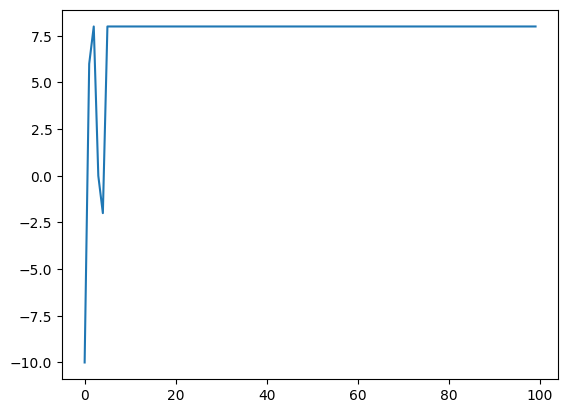

In [11]:
rewards = []
totalReward = 0
for action in range(5):
    rewards.append(Env1.step(action))
    totalReward = totalReward + reward
    
print(rewards)
bestAction = np.argmax(rewards)
print('Bandit with the highest reward is bandit',bestAction, 'with a reward of',rewards[bestAction])

for i in range(100 - 5):
    rewards.append(Env1.step(bestAction))
    totalReward = totalReward + Env1.step(bestAction)

print('The total reward = ', totalReward)

# Plot the rewards as a funtion of the number of trials
plt.plot(rewards)

##### 2. Stochastic bandits

In the case of stochastic bandits, the reward is sampled from an initially unknown distribution. Our task is to discover the expected reward of each of the bandits as quickly (and reliably) as possible. 
As an example, assume that the reward of a bandit comes from a normal distribution with mean = 10 and standard deviation of 5. This means that in 68% procent of the trials this bandit will return a reward between 10-5 = 5 and 10+5 = 15. If you play this bandit multiple times, you can expect that the average reward will converge to 10.

Use BanditEnv_2 for this exercise. All 5 bandits have rewards coming from normal distributions with different means, but with the same standard deviation (std = 1).
You can play this bandit 200 times. Try to come up with a good strategy to maximize the total reward over these 200 trials.

In [12]:
class BanditEnv_2:
    def __init__(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1
        
    def reset(self):
        self.means = [-10,6,8,0,-2]
        self.std = 1

    def step(self,action):
        self.action = action
        return np.random.normal(self.means[self.action], self.std, 1)[0]

In [13]:
# Create an Env2 object
Env2 = BanditEnv_2()
Env2.reset()
print(Env2.means)

[-10, 6, 8, 0, -2]


### 2.1 Epsilon Greedy

1. Implement the epsilon greedy algorithm to play the Env2 bandits. 
2. Show the influence of epsilon parameter. Do this by plotting the reward history for different values of epsilon. Also visualize how often a bandit was chosen.
3. Find the optimal epsilon value giving you maximum total reward.
4. Use epsilon decay. This means that you gradually decrease the value of epsilon as the number of trials increases. Use the following rule: $\epsilon(t+1) = \eta \times \epsilon(t) $ where $0< \eta < 1$
5. Now test for different values of the standard deviation. What if the standard deviation becomes larger?

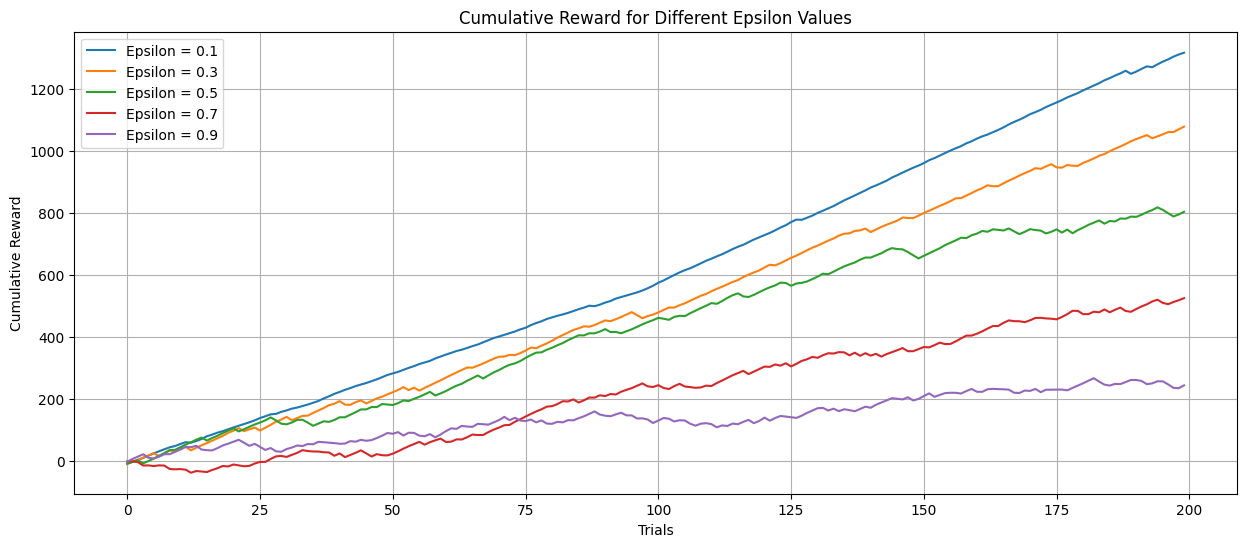

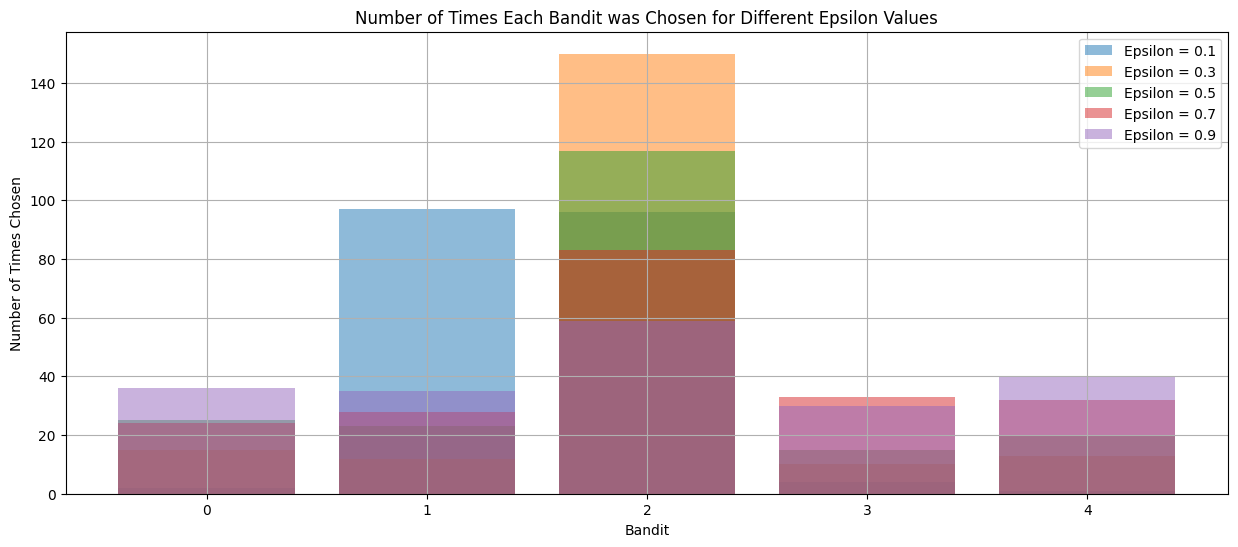

In [14]:
# Epsilon-Greedy function
def epsilon_greedy(env, epsilon=0.1, trials=200, decay=None, eta=0.99):
    """
    Implement the epsilon greedy algorithm for the given environment.
    
    Parameters:
    - env: The BanditEnv_2 environment.
    - epsilon: The probability of exploring (choosing a random action).
    - trials: Number of trials to run.
    - decay: If true, apply epsilon decay over time.
    - eta: Decay factor for epsilon.
    
    Returns:
    - rewards: List of rewards obtained in each trial.
    - choices: List of chosen bandits in each trial.
    """
    n_bandits = len(env.means)  # Number of bandits
    Q_values = np.zeros(n_bandits)  # Estimate of each bandit's mean reward
    counts = np.zeros(n_bandits)  # Number of times each bandit is chosen

    rewards = []  # Track rewards
    choices = []  # Track chosen bandits

    for t in range(trials):
        if np.random.rand() < epsilon:  # Explore: choose a random bandit
            action = np.random.randint(0, n_bandits)
        else:  # Exploit: choose the bandit with the highest estimated reward
            action = np.argmax(Q_values)

        # Take action and get reward
        reward = env.step(action)
        
        # Update the estimates for the selected bandit
        counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / counts[action]
        
        # Track rewards and choices
        rewards.append(reward)
        choices.append(action)

        # Decay epsilon if applicable
        if decay:
            epsilon = eta * epsilon

    return rewards, choices

# Visualization function
def visualize_results(rewards, choices, epsilon_values):
    """
    Visualize the influence of epsilon on cumulative rewards and bandit selections.
    
    Parameters:
    - rewards: List of reward histories for different epsilon values.
    - choices: List of bandit choices for different epsilon values.
    - epsilon_values: List of epsilon values used in the experiments.
    """
    # Plot cumulative rewards
    plt.figure(figsize=(15, 6))
    for i, eps in enumerate(epsilon_values):
        plt.plot(np.cumsum(rewards[i]), label=f"Epsilon = {eps}")
    plt.xlabel("Trials")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Reward for Different Epsilon Values")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot how often each bandit was chosen for each epsilon value
    plt.figure(figsize=(15, 6))
    for i, eps in enumerate(epsilon_values):
        plt.bar(range(len(env.means)), [choices[i].count(b) for b in range(len(env.means))], alpha=0.5, label=f"Epsilon = {eps}")
    plt.xlabel("Bandit")
    plt.ylabel("Number of Times Chosen")
    plt.title("Number of Times Each Bandit was Chosen for Different Epsilon Values")
    plt.legend()
    plt.grid()
    plt.show()

# Testing the implementation

# Initialize environment
env = BanditEnv_2()
env.reset()

# Experiment with different epsilon values
epsilon_values = [0.1, 0.3, 0.5, 0.7, 0.9]
rewards_all = []
choices_all = []

# Run epsilon-greedy for each epsilon value
for epsilon in epsilon_values:
    rewards, choices = epsilon_greedy(env, epsilon=epsilon, trials=200)
    rewards_all.append(rewards)
    choices_all.append(choices)

# Visualize results
visualize_results(rewards_all, choices_all, epsilon_values)



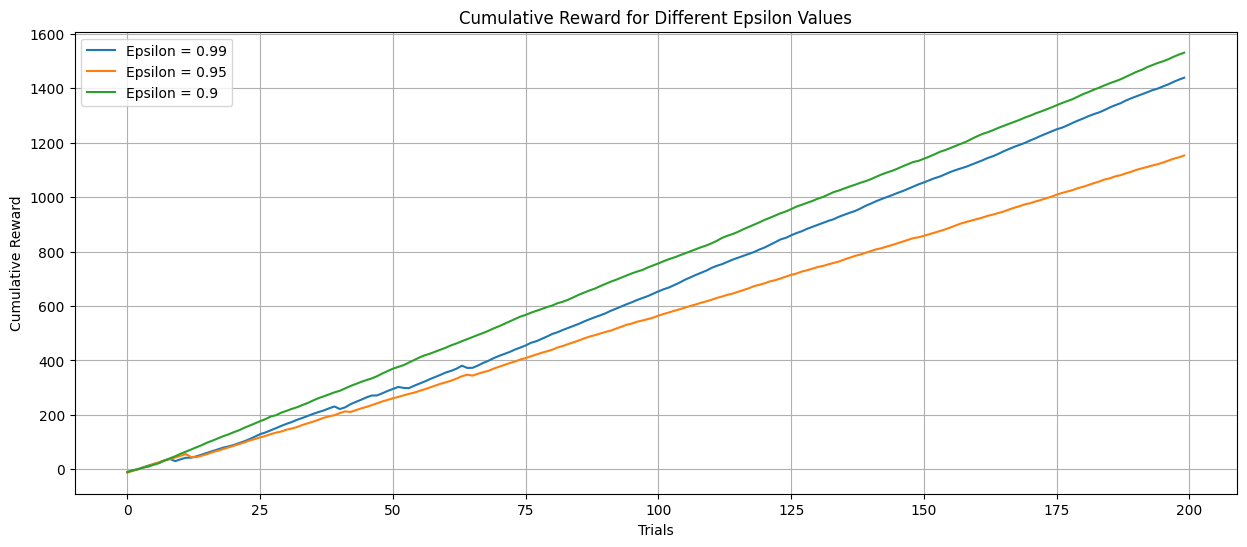

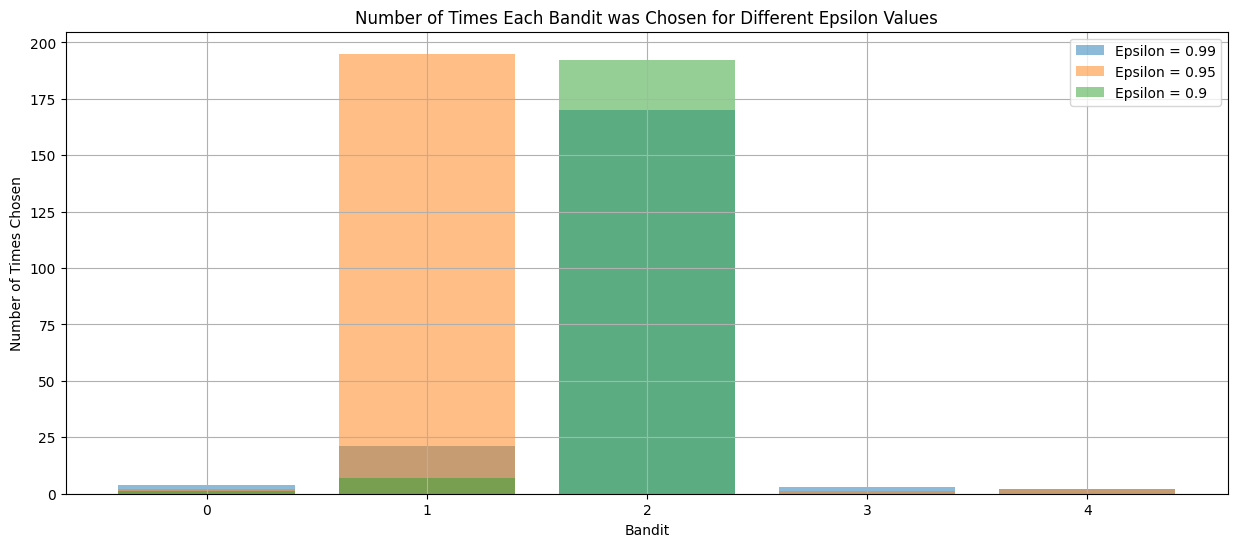

In [15]:
# Epsilon-Greedy function with decay
def epsilon_greedy_with_decay(env, initial_epsilon=0.1, trials=200, eta=0.99):
    """
    Epsilon greedy algorithm with epsilon decay.

    Parameters:
    - env: The BanditEnv_2 environment.
    - initial_epsilon: Initial value of epsilon for exploration.
    - trials: Number of trials to run.
    - eta: Decay factor for epsilon.

    Returns:
    - rewards: List of rewards obtained in each trial.
    - choices: List of chosen bandits in each trial.
    """
    n_bandits = len(env.means)  # Number of bandits
    Q_values = np.zeros(n_bandits)  # Estimate of each bandit's mean reward
    counts = np.zeros(n_bandits)  # Number of times each bandit is chosen

    rewards = []  # Track rewards
    choices = []  # Track chosen bandits

    epsilon = initial_epsilon  # Start with the initial epsilon value

    for t in range(trials):
        if np.random.rand() < epsilon:  # Explore: choose a random bandit
            action = np.random.randint(0, n_bandits)
        else:  # Exploit: choose the bandit with the highest estimated reward
            action = np.argmax(Q_values)

        # Take action and get reward
        reward = env.step(action)
        
        # Update the estimates for the selected bandit
        counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / counts[action]
        
        # Track rewards and choices
        rewards.append(reward)
        choices.append(action)

        # Decay epsilon
        epsilon = eta * epsilon

    return rewards, choices

# Testing the implementation with epsilon decay
initial_epsilon = 0.1
eta_values = [0.99, 0.95, 0.9]
rewards_decay_all = []
choices_decay_all = []

for eta in eta_values:
    rewards_decay, choices_decay = epsilon_greedy_with_decay(env, initial_epsilon=initial_epsilon, trials=200, eta=eta)
    rewards_decay_all.append(rewards_decay)
    choices_decay_all.append(choices_decay)

# Visualize results for epsilon decay
visualize_results(rewards_decay_all, choices_decay_all, eta_values)

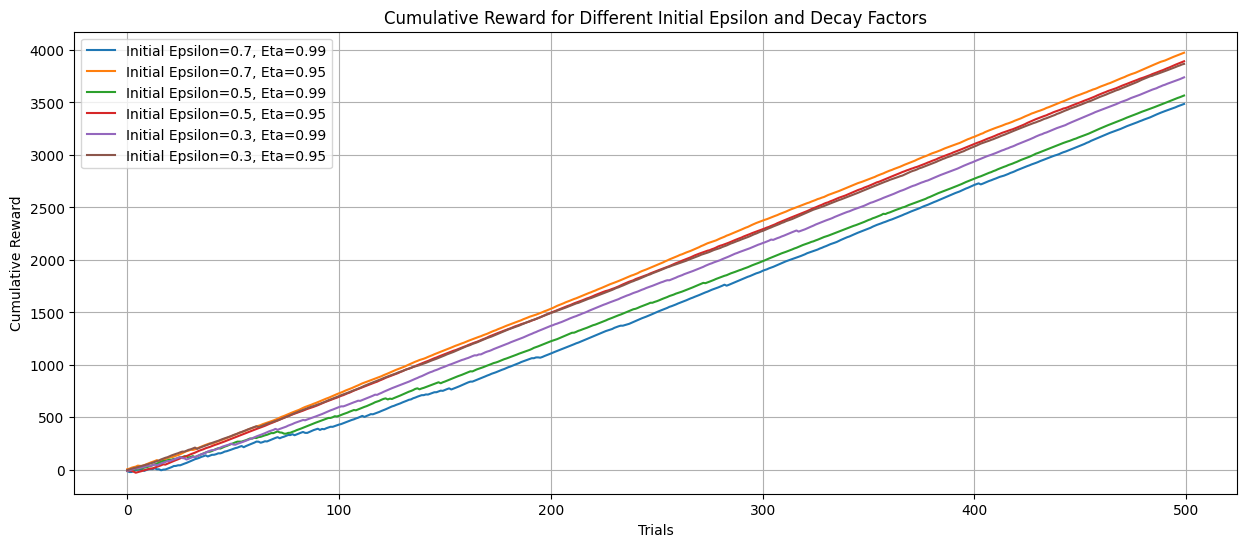

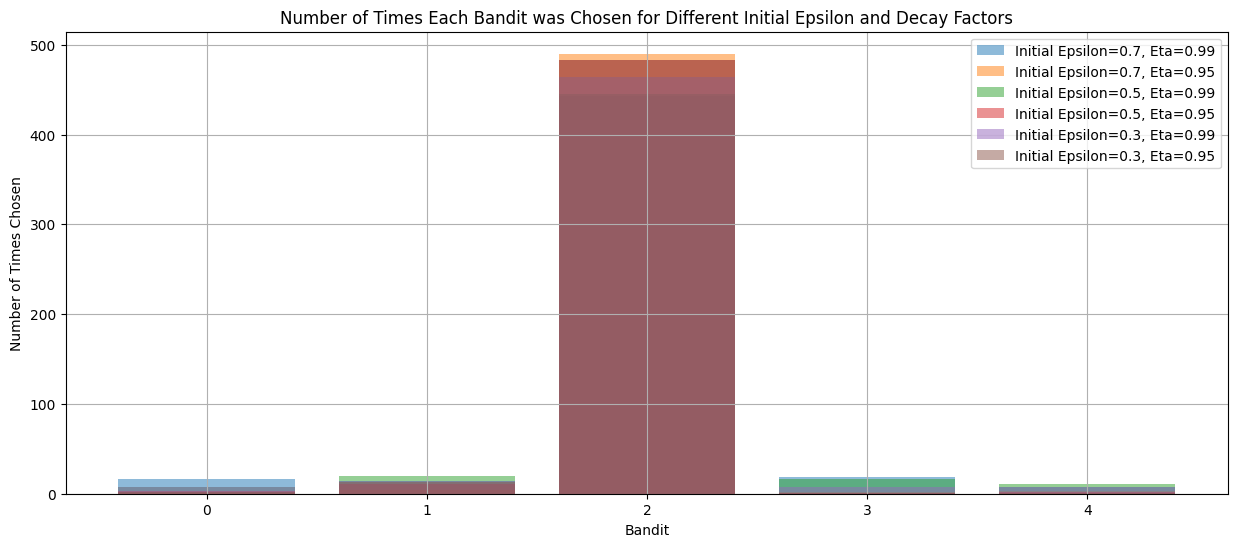

In [16]:
# Further experimentation with different initial epsilon values and decay factors
initial_epsilon_values = [0.7, 0.5, 0.3]  # Test with lower initial epsilon values
eta_values = [0.99, 0.95]  # Test with different decay rates
trials = 500  # Increase the number of trials

# Storage for results
rewards_exp_all = []
choices_exp_all = []
labels = []

# Run experiments for combinations of initial epsilon and decay factors
for initial_epsilon in initial_epsilon_values:
    for eta in eta_values:
        rewards_exp, choices_exp = epsilon_greedy_with_decay(env, initial_epsilon=initial_epsilon, trials=trials, eta=eta)
        rewards_exp_all.append(rewards_exp)
        choices_exp_all.append(choices_exp)
        labels.append(f"Initial Epsilon={initial_epsilon}, Eta={eta}")

# Visualize the cumulative rewards for the different strategies
plt.figure(figsize=(15, 6))
for i, label in enumerate(labels):
    plt.plot(np.cumsum(rewards_exp_all[i]), label=label)
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward for Different Initial Epsilon and Decay Factors")
plt.legend()
plt.grid()
plt.show()

# Visualize the bandit selection distribution for each strategy
plt.figure(figsize=(15, 6))
for i, label in enumerate(labels):
    plt.bar(range(len(env.means)), [choices_exp_all[i].count(b) for b in range(len(env.means))], alpha=0.5, label=label)
plt.xlabel("Bandit")
plt.ylabel("Number of Times Chosen")
plt.title("Number of Times Each Bandit was Chosen for Different Initial Epsilon and Decay Factors")
plt.legend()
plt.grid()
plt.show()

### 2.2 Optimistic Initial Value

Continue to work with the Env2 environment. 
Implement the Optimistic Initial Value algorithm. Start by initializing the estimated bandit means to a high non-zero value and use a greedy approach. 
After each play the estimated bandit mean will come closer to the true bandit mean.

1. Implement the optimistic initial value algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Show the initialization. What happens if you initialize the estimated means to larger values? 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the optimistic initial value approach to the epsilon greedy approach. Plot the reward history of both in one graph.



In [18]:
# Optimistic initial value
def optimistic_initial_value(env, initial_value=10, trials=200):
    """
    Optimistic Initial Value algorithm for the multi-armed bandit problem.
    
    Parameters:
    - env: The BanditEnv_2 environment.
    - initial_value: The optimistic initial value for all bandits' estimated means.
    - trials: Number of trials to run.

    Returns:
    - rewards: List of rewards obtained in each trial.
    - choices: List of chosen bandits in each trial.
    - Q_values: Final estimated values for each bandit.
    """
    n_bandits = len(env.means)  # Number of bandits
    Q_values = np.full(n_bandits, initial_value)  # Optimistically initialized values
    counts = np.zeros(n_bandits)  # Number of times each bandit is chosen
    
    rewards = []  # Track rewards
    choices = []  # Track chosen bandits

    for t in range(trials):
        # Greedy approach: Choose the bandit with the highest estimated value
        action = np.argmax(Q_values)

        # Take action and get reward
        reward = env.step(action)
        
        # Update the estimates for the selected bandit
        counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / counts[action]
        
        # Track rewards and choices
        rewards.append(reward)
        choices.append(action)

    return rewards, choices, Q_values

# Run the optimistic initial value algorithm with an initial value of 10
initial_value = 10
rewards_oiv, choices_oiv, final_estimated_means = optimistic_initial_value(env=Env2, initial_value=initial_value, trials=200)

# Print the final estimated means
print("Final estimated means for each bandit with initial value = 10:")
print(final_estimated_means)




Final estimated means for each bandit with initial value = 10:
[-9  4  5  0 -2]


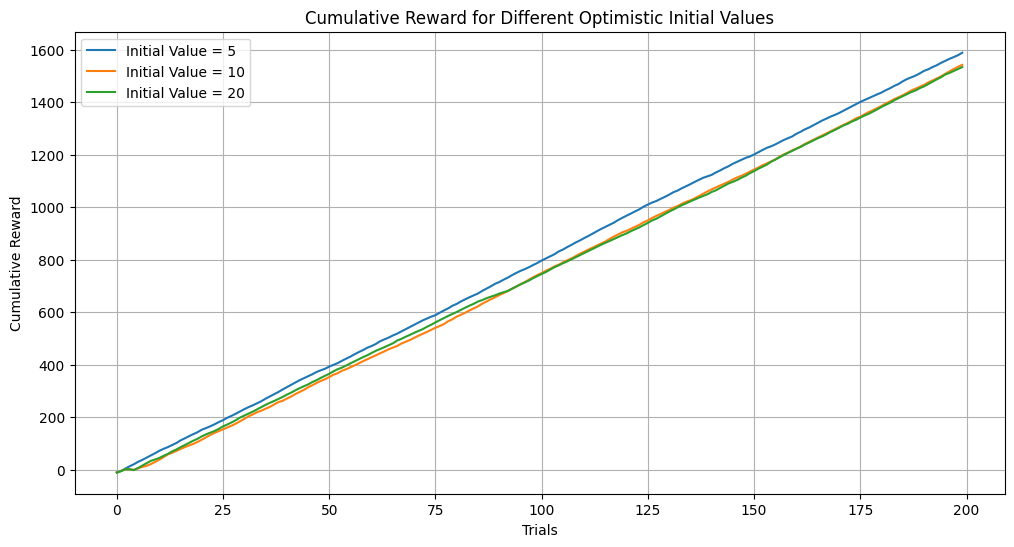

Final estimated means with Initial Value = 5: [-9  4  5  5  5]
Final estimated means with Initial Value = 10: [-10   4   5   0  -1]
Final estimated means with Initial Value = 20: [-11   4   5   0  -3]


In [19]:
# Test with different initial values
initial_values = [5, 10, 20]  # Different levels of optimistic initial values
rewards_all = []
choices_all = []
means_all = []

for init_val in initial_values:
    rewards, choices, means = optimistic_initial_value(env=Env2, initial_value=init_val, trials=200)
    rewards_all.append(rewards)
    choices_all.append(choices)
    means_all.append(means)

# Plot cumulative rewards for different initial values
plt.figure(figsize=(12, 6))
for i, init_val in enumerate(initial_values):
    plt.plot(np.cumsum(rewards_all[i]), label=f"Initial Value = {init_val}")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward for Different Optimistic Initial Values")
plt.legend()
plt.grid()
plt.show()

# Print the final estimated means for different initial values
for i, init_val in enumerate(initial_values):
    print(f"Final estimated means with Initial Value = {init_val}: {means_all[i]}")

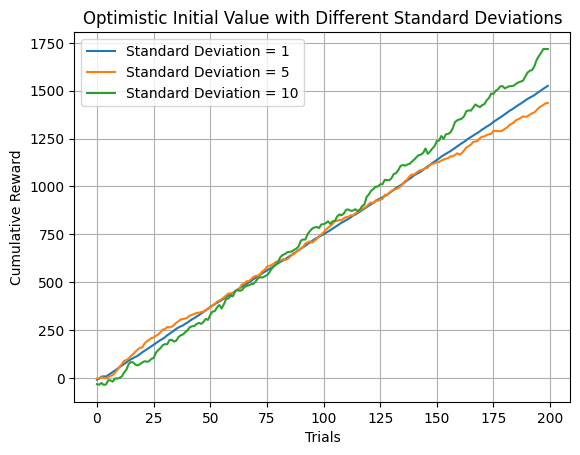

In [20]:
# Modify BanditEnv_2 to test with different standard deviations
class BanditEnv_2_Modified:
    def __init__(self, std=1):
        self.means = [-10, 6, 8, 0, -2]
        self.std = std

    def reset(self):
        self.means = [-10, 6, 8, 0, -2]
        self.std = self.std

    def step(self, action):
        return np.random.normal(self.means[action], self.std, 1)[0]

# Test with different standard deviations
std_values = [1, 5, 10]  # Standard deviations to test
for std in std_values:
    # Create a new environment with the specified standard deviation
    Env2_std = BanditEnv_2_Modified(std=std)
    Env2_std.reset()
    
    # Run the optimistic initial value algorithm
    rewards_std, _, means_std = optimistic_initial_value(env=Env2_std, initial_value=10, trials=200)
    
    # Plot the cumulative reward
    plt.plot(np.cumsum(rewards_std), label=f"Standard Deviation = {std}")

# Plot the results
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Optimistic Initial Value with Different Standard Deviations")
plt.legend()
plt.grid()
plt.show()

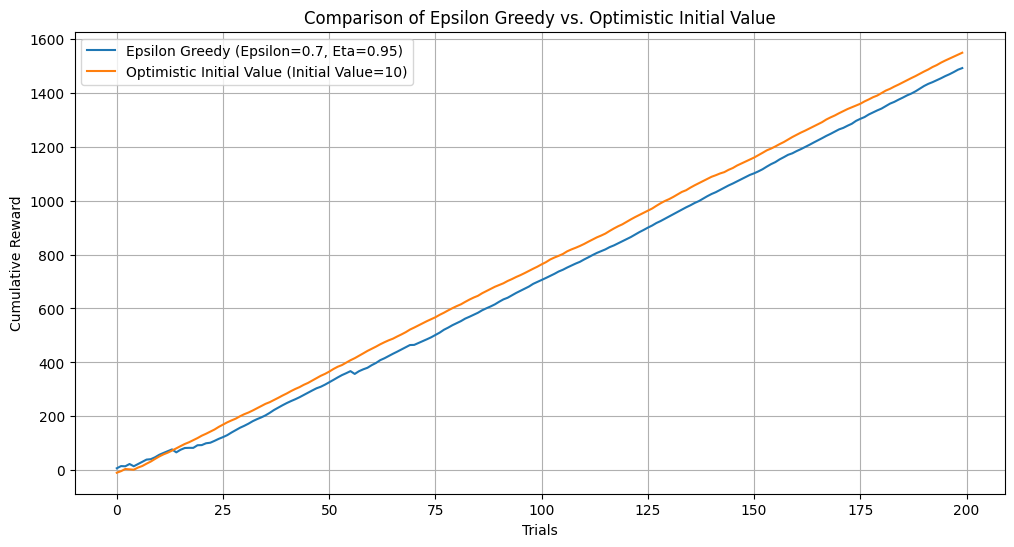

In [21]:
# Run Epsilon Greedy with the best configuration found earlier (initial epsilon = 0.7, eta = 0.95)
rewards_eg, _ = epsilon_greedy_with_decay(env=Env2, initial_epsilon=0.7, trials=200, eta=0.95)

# Run Optimistic Initial Value algorithm
rewards_oiv, _, _ = optimistic_initial_value(env=Env2, initial_value=10, trials=200)

# Plot both cumulative reward histories
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(rewards_eg), label="Epsilon Greedy (Epsilon=0.7, Eta=0.95)")
plt.plot(np.cumsum(rewards_oiv), label="Optimistic Initial Value (Initial Value=10)")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Comparison of Epsilon Greedy vs. Optimistic Initial Value")
plt.legend()
plt.grid()
plt.show()

### 2.3 Upper Confidence Bound

Continue to work with the Env2 environment and implement the Upper Confidence Bound algorithm. 
Select the action based on the following rule:

$A_t = argmax_a \left( MeanRewards + c  \sqrt{\frac{\ln{t}}{N_a(t)}}  \right)$

1. Implement the upper confidence bound algorithm to play the Env2 bandits. Check the final values of the estimated means.
2. Change the parameter c? Explain the influence of c. 
3. Now test for different values of the standard deviation. What if the standard deviation becomes larger?
4. Compare the upper confidence bound approach to the epsilon greedy approach and opimistic initial value. Plot the reward histories of the algorithms in one graph.


In [22]:
# Upper Confidence Bound
def upper_confidence_bound(env, c=2, trials=200):
    """
    Upper Confidence Bound algorithm for the multi-armed bandit problem.
    
    Parameters:
    - env: The BanditEnv_2 environment.
    - c: Exploration parameter controlling the confidence interval.
    - trials: Number of trials to run.

    Returns:
    - rewards: List of rewards obtained in each trial.
    - choices: List of chosen bandits in each trial.
    - Q_values: Final estimated values for each bandit.
    """
    n_bandits = len(env.means)  # Number of bandits
    Q_values = np.zeros(n_bandits)  # Estimated mean rewards for each bandit
    counts = np.zeros(n_bandits)  # Number of times each bandit is chosen
    
    rewards = []  # Track rewards
    choices = []  # Track chosen bandits
    
    # Play each bandit once to initialize estimates
    for a in range(n_bandits):
        reward = env.step(a)
        Q_values[a] = reward
        counts[a] += 1
        rewards.append(reward)
        choices.append(a)

    # Continue playing based on UCB rule
    for t in range(n_bandits, trials):
        # Calculate UCB value for each bandit
        ucb_values = Q_values + c * np.sqrt(np.log(t + 1) / counts)
        
        # Select the bandit with the highest UCB value
        action = np.argmax(ucb_values)
        
        # Take action and get reward
        reward = env.step(action)
        
        # Update the estimates for the selected bandit
        counts[action] += 1
        Q_values[action] += (reward - Q_values[action]) / counts[action]
        
        # Track rewards and choices
        rewards.append(reward)
        choices.append(action)

    return rewards, choices, Q_values

# Run the UCB algorithm with parameter c = 2
rewards_ucb, choices_ucb, final_estimated_means_ucb = upper_confidence_bound(env=Env2, c=2, trials=200)

# Print the final estimated means for each bandit
print("Final estimated means for each bandit with UCB (c = 2):")
print(final_estimated_means_ucb)

Final estimated means for each bandit with UCB (c = 2):
[-11.50303459   6.46746505   7.92298254   1.89911038  -3.67367113]


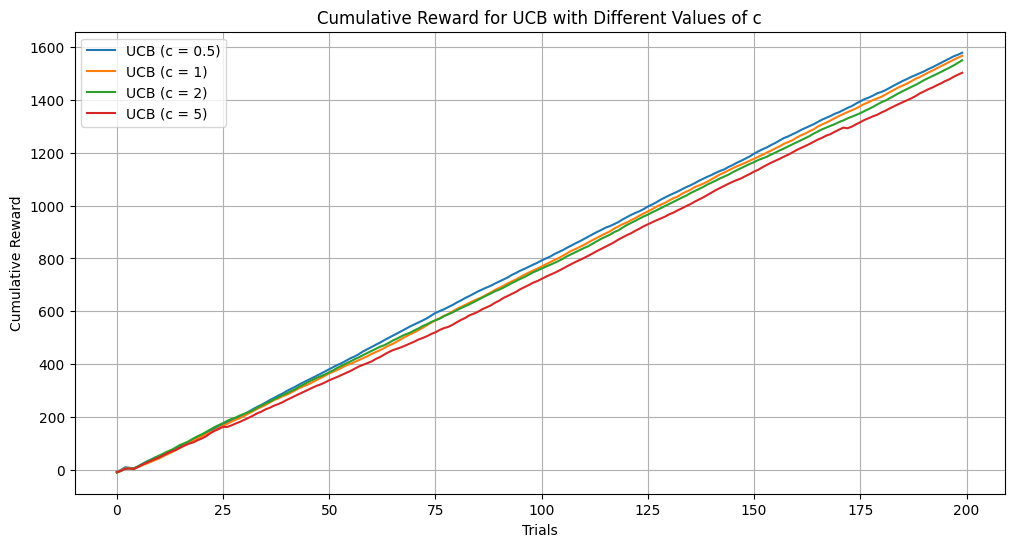

In [23]:
# Test UCB with different values of c
c_values = [0.5, 1, 2, 5]  # Different levels of exploration
rewards_all_ucb = []

for c in c_values:
    rewards, _, _ = upper_confidence_bound(env=Env2, c=c, trials=200)
    rewards_all_ucb.append(rewards)

# Plot cumulative rewards for different values of c
plt.figure(figsize=(12, 6))
for i, c in enumerate(c_values):
    plt.plot(np.cumsum(rewards_all_ucb[i]), label=f"UCB (c = {c})")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward for UCB with Different Values of c")
plt.legend()
plt.grid()
plt.show()

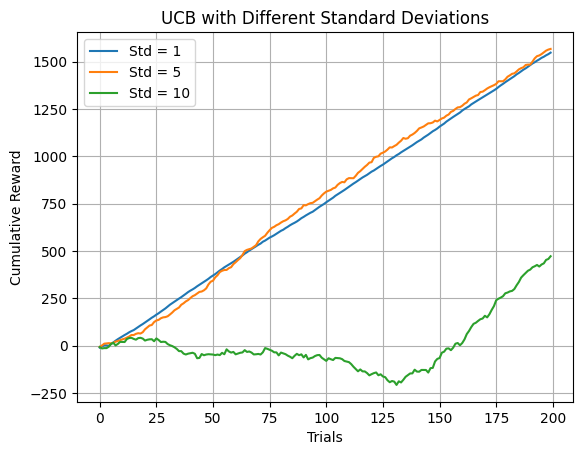

In [24]:
# Modify BanditEnv_2 to test with different standard deviations
class BanditEnv_2_Modified:
    def __init__(self, std=1):
        self.means = [-10, 6, 8, 0, -2]
        self.std = std

    def reset(self):
        self.means = [-10, 6, 8, 0, -2]
        self.std = self.std

    def step(self, action):
        return np.random.normal(self.means[action], self.std, 1)[0]

# Test with different standard deviations
std_values = [1, 5, 10]  # Standard deviations to test
for std in std_values:
    # Create a new environment with the specified standard deviation
    Env2_std = BanditEnv_2_Modified(std=std)
    Env2_std.reset()
    
    # Run the UCB algorithm with c = 2
    rewards_std, _, _ = upper_confidence_bound(env=Env2_std, c=2, trials=200)
    
    # Plot the cumulative reward
    plt.plot(np.cumsum(rewards_std), label=f"Std = {std}")

# Plot the results
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("UCB with Different Standard Deviations")
plt.legend()
plt.grid()
plt.show()

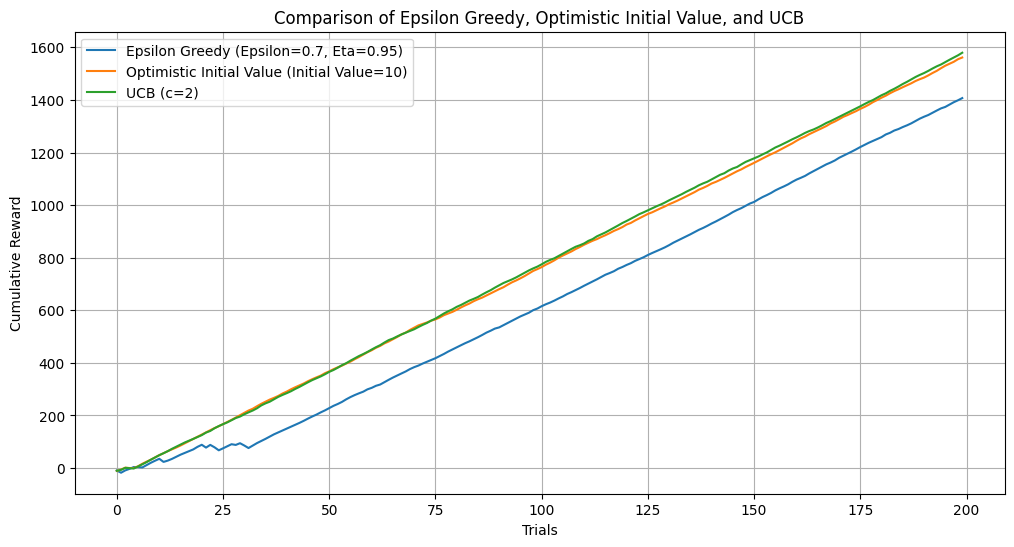

In [30]:
# Run Epsilon Greedy with the best configuration found earlier (initial epsilon = 0.7, eta = 0.95)
rewards_eg, _ = epsilon_greedy_with_decay(env=Env2, initial_epsilon=0.7, trials=200, eta=0.95)

# Run Optimistic Initial Value algorithm
rewards_oiv, _, _ = optimistic_initial_value(env=Env2, initial_value=10, trials=200)

# Run UCB with c = 2
rewards_ucb, _, _ = upper_confidence_bound(env=Env2, c=2, trials=200)

# Plot cumulative reward histories for all three algorithms
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(rewards_eg), label="Epsilon Greedy (Epsilon=0.7, Eta=0.95)")
plt.plot(np.cumsum(rewards_oiv), label="Optimistic Initial Value (Initial Value=10)")
plt.plot(np.cumsum(rewards_ucb), label="UCB (c=2)")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Comparison of Epsilon Greedy, Optimistic Initial Value, and UCB")
plt.legend()
plt.grid()
plt.show()

### EXTRA: non-stationary bandits

In the following you have to deal with non-stationary bandits. This means that the expected reward is not stationary and will change over time. 
in the BanditEnv_3, the initial expected rewards will change with a constant after each action.

Figure out the best strategy to optimize the total reward after 200 actions.

In [27]:
class BanditEnv_3:
    def __init__(self):
        self.means = np.array([[-10,6,8,0,-2]])
        self.std = 1
    def reset(self):
        self.means = np.array([[-10,6,8,0,-2]])
        
    def step(self,action):
        self.action = action
        self.means = self.means + np.array([[0.15,-0.1,-0.15,0.05,0.1]])
        return np.random.normal(self.means[0,self.action], self.std, 1)[0]

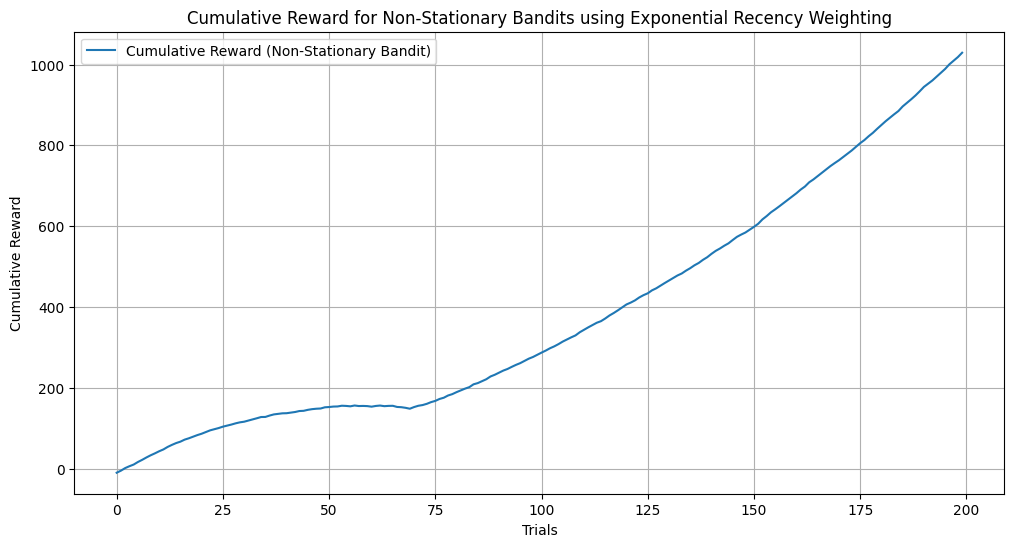

Final estimated means for each bandit (Non-Stationary):
[-0.98451257 -0.08770589 -0.22445176  9.43470024  0.        ]


In [28]:
# create an env3 environment
env3 = BanditEnv_3()
env3.reset()

# solve the environment (for 200 steps)
# Implementing Exponential Recency Weighting for Non-Stationary Bandits
class NonStationaryBandit:
    def __init__(self, env, alpha=0.1, trials=200):
        self.env = env
        self.alpha = alpha  # Learning rate
        self.trials = trials
        self.n_bandits = len(env.means[0])  # Number of bandits
        self.Q_values = np.zeros(self.n_bandits)  # Estimated mean rewards
        self.rewards = []  # Track rewards

    def run(self):
        for t in range(self.trials):
            # Choose action: can use epsilon-greedy or UCB; here we'll use a simple max based on current estimates
            action = np.argmax(self.Q_values)

            # Get reward from the environment
            reward = self.env.step(action)

            # Update the estimated value for the chosen action
            self.Q_values[action] += self.alpha * (reward - self.Q_values[action])

            # Track the reward
            self.rewards.append(reward)

        return self.Q_values, self.rewards

# Create the BanditEnv_3 environment
env3 = BanditEnv_3()
env3.reset()

# Run the Non-Stationary Bandit with Exponential Recency Weighting
non_stationary_bandit = NonStationaryBandit(env3, alpha=0.1, trials=200)
final_estimated_means_ns, rewards_ns = non_stationary_bandit.run()

# Plot the cumulative rewards
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(rewards_ns), label="Cumulative Reward (Non-Stationary Bandit)")
plt.xlabel("Trials")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward for Non-Stationary Bandits using Exponential Recency Weighting")
plt.legend()
plt.grid()
plt.show()

# Display final estimated means
print("Final estimated means for each bandit (Non-Stationary):")
print(final_estimated_means_ns)

## 3. Server latencies

You have to make 1000 webpage requests. There are 25 servers with different latencies to choose from. 
Your task is to come up with a clever strategy to reduce the cumulative latency of these 1000 webpage requests.
The file 'latencies.csv' contains these 1000 different request. 
It's important to know that in a practical situation you would not have access to this data and requests will be made sequentially.
Use a multi-armed bandit to find the best strategy to minimize the total latency over these 1000 requests. Again, it's not allowed to process and statistically analyse the data in advance.

1. Try and optimize different types of bandits: epsilon-greedy, optimistic initial value, upper confidence bound. 
2. Compare these bandits in terms of total cumulated reward (or regret). Make a graph to visualize this.
3. Make graphs showing how often each bandit was chosen.


EXTRA: program a bayesian badit to solve the latency problem.

In [31]:
dataset = pd.read_csv('latencies.csv')
dataset.tail()

,Server_1,Server_2,Server_3,Server_4,Server_5,Server_6,Server_7,Server_8,Server_9,Server_10,...,Server_16,Server_17,Server_18,Server_19,Server_20,Server_21,Server_22,Server_23,Server_24,Server_25
995,265,1080,136,25,395,1350,105,113,85,471,...,414,129,410,176,589,92,56,1298,234,2603
996,473,6306,84,121,392,33,103,97,876,883,...,451,129,412,245,1113,132,62,11429,305,2264
997,269,1064,83,25,399,33,104,99,615,639,...,417,132,561,143,652,101,56,953,232,2293
998,270,1071,84,24,393,33,120,118,298,755,...,415,129,327,871,670,109,60,954,232,2251
999,296,1065,84,25,395,34,104,111,83,751,...,413,130,305,122,763,102,74,1640,352,2530


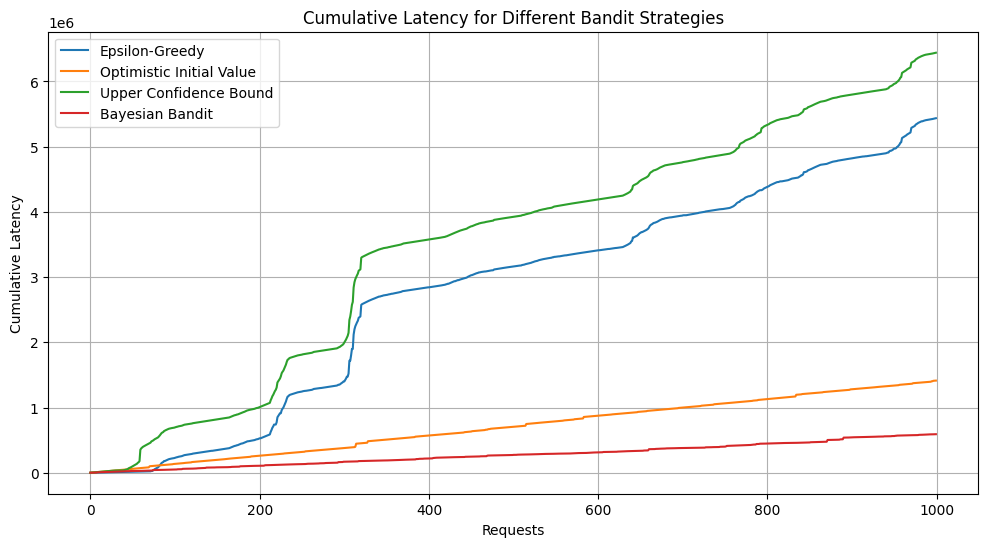

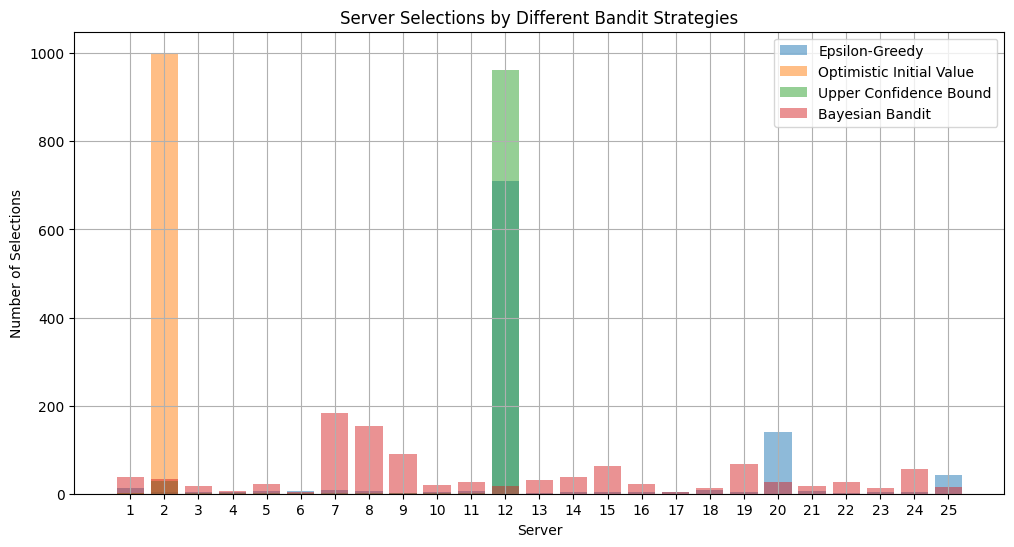

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
latencies = pd.read_csv('latencies.csv')
num_requests = latencies.shape[0]
num_servers = latencies.shape[1]

# Define Bandit Algorithms
class EpsilonGreedyBandit:
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon
        self.n_servers = num_servers
        self.counts = np.zeros(self.n_servers)
        self.values = np.zeros(self.n_servers)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_servers)  # Explore
        else:
            return np.argmax(self.values)  # Exploit

    def update(self, action, reward):
        self.counts[action] += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]

class OptimisticInitialValueBandit:
    def __init__(self, initial_value=1000):
        self.n_servers = num_servers
        self.counts = np.zeros(self.n_servers)
        self.values = np.full(self.n_servers, initial_value)

    def select_action(self):
        return np.argmax(self.values)  # Always exploit

    def update(self, action, reward):
        self.counts[action] += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]

class UpperConfidenceBoundBandit:
    def __init__(self, c=2):
        self.n_servers = num_servers
        self.counts = np.zeros(self.n_servers)
        self.values = np.zeros(self.n_servers)
        self.c = c  # Initialize the c parameter

    def select_action(self, t):
        ucb_values = self.values + self.c * np.sqrt(np.log(t + 1) / (self.counts + 1e-5))
        return np.argmax(ucb_values)

    def update(self, action, reward):
        self.counts[action] += 1
        self.values[action] += (reward - self.values[action]) / self.counts[action]

class BayesianBandit:
    def __init__(self):
        self.n_servers = num_servers
        self.successes = np.zeros(self.n_servers)
        self.failures = np.zeros(self.n_servers)

    def select_action(self):
        # Sample from the beta distribution for each server
        sampled_values = np.random.beta(self.successes + 1, self.failures + 1)
        return np.argmax(sampled_values)

    def update(self, action, reward):
        if reward < np.inf:
            self.successes[action] += 1  # Success if we get a reward
        else:
            self.failures[action] += 1  # Failure if no reward

# Function to run the experiments
def run_experiment(bandit_class, **kwargs):
    bandit = bandit_class(**kwargs)
    cumulative_rewards = []
    total_reward = 0

    for t in range(num_requests):
        if isinstance(bandit, UpperConfidenceBoundBandit):
            action = bandit.select_action(t)  # Pass time step t
        else:
            action = bandit.select_action()
        
        reward = latencies.iloc[t, action]  # Get the latency for the selected server
        total_reward += reward
        bandit.update(action, reward)
        cumulative_rewards.append(total_reward)

    return cumulative_rewards

# Run experiments
epsilon_greedy_rewards = run_experiment(EpsilonGreedyBandit, epsilon=0.1)
optimistic_rewards = run_experiment(OptimisticInitialValueBandit, initial_value=1000)
ucb_rewards = run_experiment(UpperConfidenceBoundBandit, c=2)
bayesian_rewards = run_experiment(BayesianBandit)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(epsilon_greedy_rewards, label='Epsilon-Greedy')
plt.plot(optimistic_rewards, label='Optimistic Initial Value')
plt.plot(ucb_rewards, label='Upper Confidence Bound')
plt.plot(bayesian_rewards, label='Bayesian Bandit')
plt.xlabel('Requests')
plt.ylabel('Cumulative Latency')
plt.title('Cumulative Latency for Different Bandit Strategies')
plt.legend()
plt.grid()
plt.show()

# Visualizing server selections
def plot_server_selection(bandit_class, **kwargs):
    bandit = bandit_class(**kwargs)
    selections = np.zeros(num_servers)
    
    for t in range(num_requests):
        if isinstance(bandit, UpperConfidenceBoundBandit):
            action = bandit.select_action(t)  # Pass time step t
        else:
            action = bandit.select_action()
        
        selections[action] += 1
        reward = latencies.iloc[t, action]
        bandit.update(action, reward)

    return selections

epsilon_greedy_selections = plot_server_selection(EpsilonGreedyBandit, epsilon=0.1)
optimistic_selections = plot_server_selection(OptimisticInitialValueBandit, initial_value=1000)
ucb_selections = plot_server_selection(UpperConfidenceBoundBandit, c=2)
bayesian_selections = plot_server_selection(BayesianBandit)

# Plotting server selections
plt.figure(figsize=(12, 6))
plt.bar(range(1, num_servers + 1), epsilon_greedy_selections, alpha=0.5, label='Epsilon-Greedy')
plt.bar(range(1, num_servers + 1), optimistic_selections, alpha=0.5, label='Optimistic Initial Value')
plt.bar(range(1, num_servers + 1), ucb_selections, alpha=0.5, label='Upper Confidence Bound')
plt.bar(range(1, num_servers + 1), bayesian_selections, alpha=0.5, label='Bayesian Bandit')
plt.xlabel('Server')
plt.ylabel('Number of Selections')
plt.title('Server Selections by Different Bandit Strategies')
plt.xticks(range(1, num_servers + 1))
plt.legend()
plt.grid()
plt.show()